# Тема:
### Плохая обусловленность метода Кардано

### Решение кубических уравнений методом Kардано

#### Источник уровнений и решения
https://www.youtube.com/watch?v=ecsSmmBY56Q&feature=emb_logo

Дано кубичесткое уравнение:

#### ax^3 + bx^2 + cx + d = 0, a!=0 
все коэффициенты и неизвестная  x в общем случае комплексные.

Корни уравнения:
$$
x1 = \alpha + \beta - \frac{b}{3a}
$$
$$
x2 = -\frac{\alpha + \beta}{2} - \frac{b}{3a} - \frac{i\sqrt3}{3a}(\alpha -\beta)
$$
$$
x3 = -\frac{\alpha + \beta}{2} - \frac{b}{3a} + \frac{i\sqrt3}{3a}(\alpha - \beta)
$$

$$
\alpha=\sqrt[3]{-\frac{q}{2}+\sqrt{\frac{q^2}{4}+\frac{p^3}{27}}},
\qquad
\beta=\sqrt[3]{-\frac{q}{2}-\sqrt{\frac{q^2}{4}+\frac{p^3}{27}}}.
$$
$$
\alpha , \beta -Комплекнсые.числа
$$

$$
Q = \frac{3ac - b^2}{9a^2}
\qquad
R = \frac{9abc - 27a^2d - 2b^3}{54a^3}
$$



Формула дискреминанта :

$D = Q^3 + R^2$ 

D>0->1 действительный,2-комлексных
D<=0 Все корни действительные 

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

from scipy.special import cbrt

In [2]:
def cardano(q, w, e, k):
    if q == 0:
        raise ValueError('Ошибка , т.к. q=0')
    K = ((3*q*e - w**2)/ (9*q**2))**3 +((9*q*w*e - 27*q**2*k - 2*w**3) / (54 * q**3))**2 # Дискреминнат D

    H = cbrt(((9*q*w*e - 27*q**2*k - 2*w**3) / (54 * q**3)) + np.sqrt(K))  #alpha
    L = cbrt(((9*q*w*e - 27*q**2*k - 2*w**3) / (54 * q**3)) - np.sqrt(K))  #beta

    if K> 0:
        t = 0.5j * np.sqrt(3) * (H - L)
    else:
        t = 0.5 * np.sqrt(3) * (H - L)
    
    y0 = - w / (3 * q) + (H + L)
    y1 = - w / (3 * q)  - (H + L) / 2 + t
    y2 = - w / (3 * q)  - (H + L) / 2 -  t

    return y0, y1, y2

###### Для своего удобства и  чтобы не  путанься ,не стал брать переменные с уравнений

Функция получения ноля-эпсилон

In [3]:
def get_eps():
    return sys.float_info.epsilon
# за это отвечает библиотека sys и подразделение float_info

In [4]:
get_eps()

2.220446049250313e-16

Функция для оценки точности в дальнейшем:$ y^3 +3y^2 +\lambda^2y+3\lambda^2 =0$
(Из задания) 

In [5]:
def f(y, a):
    return y**3 + 3*y**2 + a**2*y + 3*a**2;

Оценка точности работы формулы для функции $x^3 + 3x^2 + \lambda^2x + 3\lambda^2=0, \lambda \in [0, 1/eps]$

## Метод Кардано

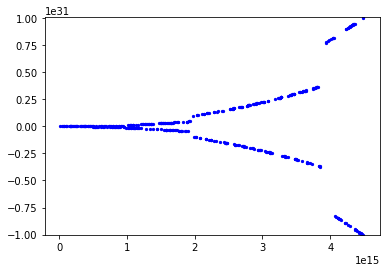

Ymin = -1.0019814915266518e+31
Ymax = 1.0070305210322068e+31


In [6]:
y_min = 0
y_max = 0

xx = np.linspace(0, 1./get_eps(), 2000)

for x in xx: 
    y0 = cardano(1, 3, x**2, 3*x**2)[0]
    y = f(y0, x)
    
    if y != 0:
        y_max = max(y_max, y)
        y_min = min(y_min, y)
    
        plt.scatter(x, y, c = 'blue', s = 5)

plt.ylim(bottom = y_min, top = y_max)
plt.show()

print('Ymin = {0}'.format(y_min))
print('Ymax = {0}'.format(y_max))

## Сравнение точности работы формулы Кардано, метода Ньютона и метода Брента

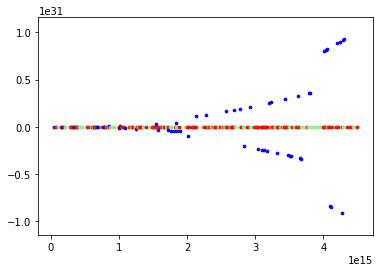

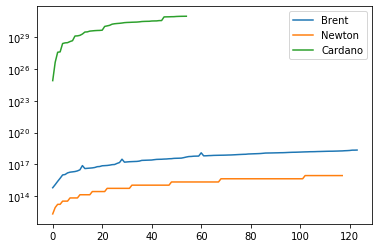

In [7]:
y_max = 0
y_min = 0
x_all=[]
y_all=[]
x__all=[]
x____all=[]
xx = np.linspace(0,  1./get_eps(), 300)

for x in xx: 
    expression = lambda _x:f(_x, x)

    cardano_y = f(cardano(1, 3, x**2, 3*x**2)[0], x)
    newton_y = f(opt.newton(expression, 0), x)
    brentq_y = f(opt.brentq(expression, -1000, 1000), x)
    
          
    if brentq_y != 0:
        x0=  f(opt.brentq(expression, -1000, 1000), x)
        x_all.append(x0)
        x_brent=x_all
        y_max = max(y_max, brentq_y)
        y_min = min(y_min, brentq_y)

        plt.scatter(x, newton_y, c = 'lightgreen', s = 7)
    
    if newton_y != 0:
        x0=  f(opt.newton(expression, 0), x)
        y_all.append(x0)
        x_newton=y_all
        y_max = max(y_max, newton_y)
        y_min = min(y_min, newton_y)

        plt.scatter(x, newton_y, c = 'red', s = 7)
        
    if cardano_y != 0:
        x0=  f(cardano(1, 3, x**2, 3*x**2)[0], x)
        x__all.append(x0)
        x_car=x__all
        y_max = max(y_max, cardano_y)
        y_min = min(y_min, cardano_y)
        
        plt.scatter(x, cardano_y, c = 'blue', s = 7)
        
  
        
        
plt.ylim(bottom = y_min * 1.25, top = y_max * 1.25)
plt.show()
###############################################################################################################################
#plt.semilogy(np.abs(np.array(np.linspace(0, 1./get_eps(), 300)) - np.pi), label='Newton')
#plt.semilogy(np.abs(np.array(opt.brentq(expression, -1000, 1000)) - np.pi), label='Newton')
plt.semilogy(np.abs(np.array(x_brent)  - np.pi), label='Brent')
plt.semilogy(np.abs(np.array(x_newton) - np.pi), label='Newton')
plt.semilogy(np.abs(np.array(x_car) - np.pi), label='Cardano')
plt.legend()
pass

## Вывод
По графику можно сделать вывод. Кардано один из самых неточных методов, т.к. допускает значительно больше погрешностей чем метод Брента и ньютона
(Логорефмический маштаб , возможно не до концка отлажен(спасибо за понимание)) 